# Stock Price Analysis

This notebook analyzes the stock prices of Apple from 2013 to 2018.

In [1]:
import numpy as np 
import pandas as pd 

import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

from datetime import datetime
import os

### Load Data: Apple Stock prices

In [2]:
aapl=pd.read_csv('./input/individual_stocks_5yr/AAPL_data.csv')

In [3]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

### Data Exploration

In [4]:
aapl.index

RangeIndex(start=0, stop=1259, step=1)

In [5]:
# We will be using the Adjusted close price to do historic price analysis of the stock
aapl.describe().T

count          mean           std           min           25%  \
open    1259.0  1.090554e+02  3.054922e+01  5.542420e+01  8.464780e+01   
high    1259.0  1.099511e+02  3.068619e+01  5.708570e+01  8.533495e+01   
low     1259.0  1.081416e+02  3.037622e+01  5.501420e+01  8.425065e+01   
close   1259.0  1.090667e+02  3.055681e+01  5.578990e+01  8.483065e+01   
volume  1259.0  5.404790e+07  3.346835e+07  1.147592e+07  2.969438e+07   

                50%           75%           max  
open         108.97  1.273350e+02  1.793700e+02  
high         110.03  1.281000e+02  1.801000e+02  
low          108.05  1.262900e+02  1.782500e+02  
close        109.01  1.271200e+02  1.792600e+02  
volume  45668931.00  6.870872e+07  2.668336e+08

In [6]:
# Display Historical Stock Price
aapl['date']=pd.to_datetime(aapl['date'])
aapl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


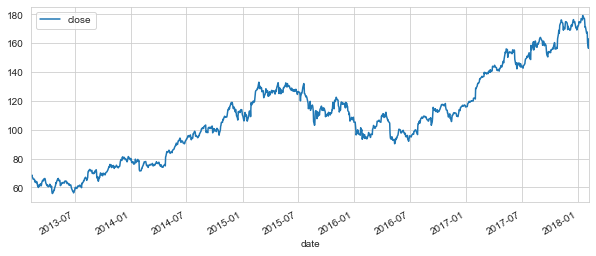

In [7]:
#Close Price of Apple Stock (We have stock Price for 5 years starting from 2013 to 2018)
aapl.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

## Volume traded for Apple Stock

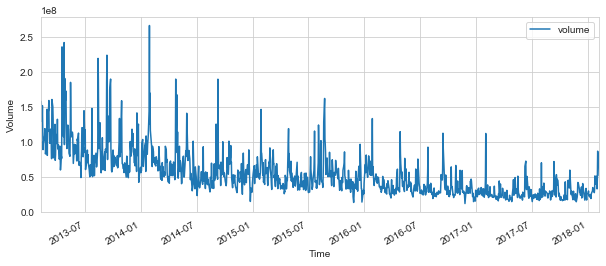

In [8]:
# Volume traded for Apple Stock
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'

ax=aapl.plot(x='date', y='volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

### Plotting between Specified time

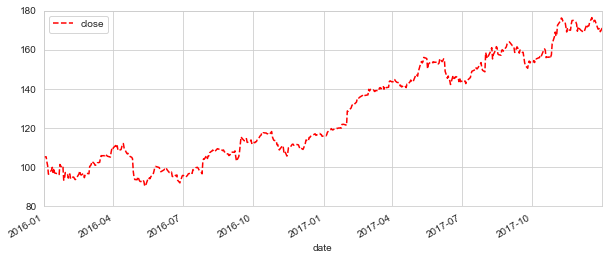

In [9]:
# Plotting between Specified time
aapl.plot(x='date', y='close',xlim=['2016-01-01','2017-12-31'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.ioff()

### Moving Average for Apple Stock

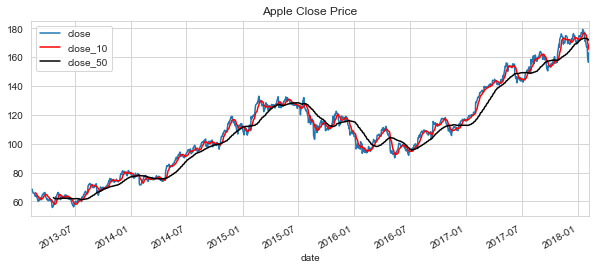

In [10]:
# Moving Average for Apple Stock
aapl['close_10']=aapl['close'].rolling(10).mean()
aapl['close_50']=aapl['close'].rolling(50).mean()

ax=aapl.plot(x='date',y='close',title='Apple Close Price',figsize=(10,4))
aapl.plot(x='date',y='close_10',color='red',ax=ax)
aapl.plot(x='date',y='close_50',color='k',ax=ax)
plt.ioff()

### Daily Return

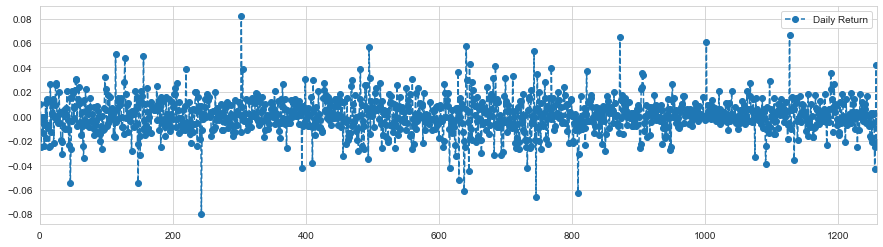

In [11]:
# Daily Return
aapl['Daily Return']=aapl['close'].pct_change()
aapl['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

__The maximum daily fluctuation in Apple stock is about 8\%__

### Average Daily return

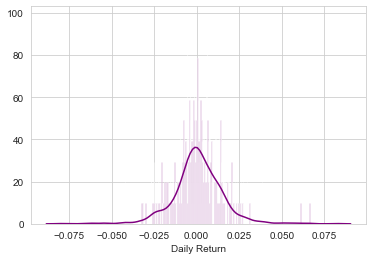

In [12]:
# Average Daily return
sns.distplot(aapl['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

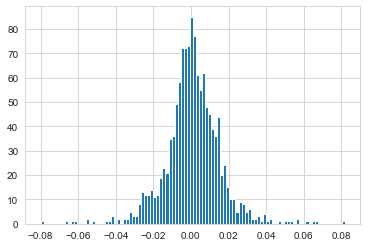

In [13]:
aapl['Daily Return'].hist(bins=100)
plt.ioff()

__The stock fluction follows a normal distribution betweem +2% and -2%__

### Risk Analysis

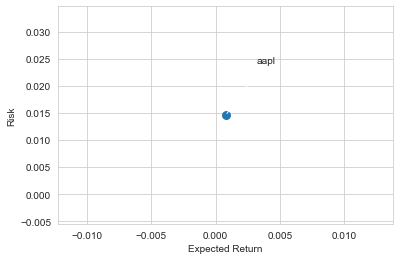

In [14]:
df=aapl['date'].copy()
df=pd.DataFrame(df)
df['aapl']=aapl['close']
df.drop(['date'], axis = 1, inplace = True, errors = 'ignore')

tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['date']=aapl['date']
tech_rets.shape

rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.3'))
# Stock with Low risk and high return are the best stock to buy    

       aapl       date
1  0.010422 2013-02-11
2 -0.025067 2013-02-12
3 -0.001903 2013-02-13
4 -0.000899 2013-02-14
5 -0.013780 2013-02-15
-0.022834076249180685


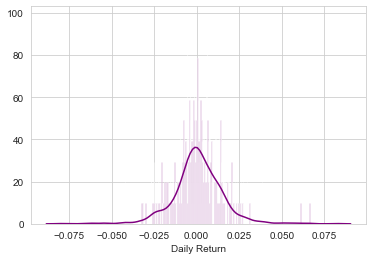

In [15]:
# Value at Risk
sns.distplot(aapl['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()
print(rets.head())
print(rets['aapl'].quantile(0.05))

__-0.022 means that 95\% of the times the worst daily Loss will not exceed 2.28\%__

In [16]:
# Value at risk using Monte Carlo Method
AAPL=pd.read_csv('./input/individual_stocks_5yr/AAPL_data.csv')
days=365
dt=1/365
mu=rets.mean()['aapl']
sigma=rets.std()['aapl']

def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

print(AAPL.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL


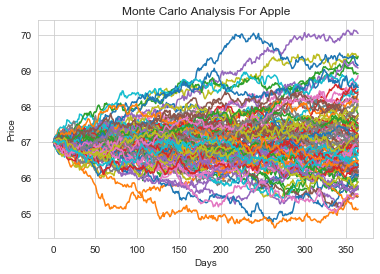

In [17]:
start_price=67
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For Apple')
plt.ioff()

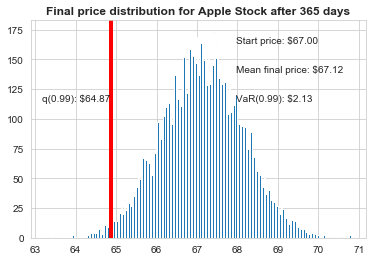

In [18]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Apple Stock after %s days" % days, weight='bold');    

We can see from out simulation that the start price of the stock is 67 $ and the mean Final Price is very close at 67.10.This means that Apple stock price is quite stable and doesnt fluctuate more. VaR(0.99) = 2.09 means that the maximm risk for insvestment in this stock is 2.09 which is small amount compared to the investement.

In [19]:
#plot the trends
offline.iplot([go.Scatter(
    x=aapl.date,
    y=aapl.close
)])

## Forecasting Apple Stock Price

In [20]:
aapl.head()

date     open     high      low    close     volume  Name  close_10  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   

   close_50  Daily Return  
0       NaN           NaN  
1       NaN      0.010422  
2       NaN     -0.025067  
3       NaN     -0.001903  
4       NaN     -0.000899

In [21]:
df_prophet=aapl[['date','close']]
df_prophet=df_prophet.sort_values('date')
df_prophet

date     close
0    2013-02-08   67.8542
1    2013-02-11   68.5614
2    2013-02-12   66.8428
3    2013-02-13   66.7156
4    2013-02-14   66.6556
...         ...       ...
1254 2018-02-01  167.7800
1255 2018-02-02  160.5000
1256 2018-02-05  156.4900
1257 2018-02-06  163.0300
1258 2018-02-07  159.5400

[1259 rows x 2 columns]

In [22]:
# Renaiming the Column names to Suite Prophet Algorithm
df_prophet=df_prophet.rename(columns={'date':'ds','close':'y'})
df_prophet

ds         y
0    2013-02-08   67.8542
1    2013-02-11   68.5614
2    2013-02-12   66.8428
3    2013-02-13   66.7156
4    2013-02-14   66.6556
...         ...       ...
1254 2018-02-01  167.7800
1255 2018-02-02  160.5000
1256 2018-02-05  156.4900
1257 2018-02-06  163.0300
1258 2018-02-07  159.5400

[1259 rows x 2 columns]

### Creating the Prophet Model

In [23]:
import random 
import seaborn as sns
from fbprophet import Prophet

m=Prophet() 
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365) # Prediction for 1 year or 365 days
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-02-08   62.120928   52.998834   63.283384    62.120928    62.120928   
1    2013-02-11   62.125419   54.608645   64.525014    62.125419    62.125419   
2    2013-02-12   62.126915   54.629012   65.536012    62.126915    62.126915   
3    2013-02-13   62.128412   54.840428   65.655764    62.128412    62.128412   
4    2013-02-14   62.129909   55.440596   65.732264    62.129909    62.129909   
...         ...         ...         ...         ...          ...          ...   
1619 2019-02-03  226.346081  197.295762  253.195209   198.924044   254.012890   
1620 2019-02-04  226.475275  192.982665  248.957157   198.953570   254.332913   
1621 2019-02-05  226.604470  193.545282  249.523442   198.983096   254.578760   
1622 2019-02-06  226.733664  190.981511  250.007939   199.012622   254.818803   
1623 2019-02-07  226.862859  195.279201  250.417279   199.026792   255.035857   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          -3.879188             -3.879188             -3.879188 -1.160923   
1          -2.442677             -2.442677             -2.442677 -1.032673   
2          -2.005853             -2.005853             -2.005853 -1.013132   
3          -1.681931             -1.681931             -1.681931 -1.087491   
4          -1.352238             -1.352238             -1.352238 -1.131977   
...              ...                   ...                   ...       ...   
1619       -2.171099             -2.171099             -2.171099  2.713098   
1620       -5.578269             -5.578269             -5.578269 -1.032673   
1621       -5.189417             -5.189417             -5.189417 -1.013132   
1622       -4.868749             -4.868749             -4.868749 -1.087491   
1623       -4.498002             -4.498002             -4.498002 -1.131977   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        -1.160923     -1.160923 -2.718265     -2.718265     -2.718265   
1        -1.032673     -1.032673 -1.410004     -1.410004     -1.410004   
2        -1.013132     -1.013132 -0.992721     -0.992721     -0.992721   
3        -1.087491     -1.087491 -0.594440     -0.594440     -0.594440   
4        -1.131977     -1.131977 -0.220261     -0.220261     -0.220261   
...            ...           ...       ...           ...           ...   
1619      2.713098      2.713098 -4.884197     -4.884197     -4.884197   
1620     -1.032673     -1.032673 -4.545597     -4.545597     -4.545597   
1621     -1.013132     -1.013132 -4.176285     -4.176285     -4.176285   
1622     -1.087491     -1.087491 -3.781258     -3.781258     -3.781258   
1623     -1.131977     -1.131977 -3.366025     -3.366025     -3.366025   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1619                   0.0                         0.0   
1620                   0.0                         0.0   
1621                   0.0                         0.0   
1622                   0.0                         0.0   
1623                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   58.241740  
1                            0.0   59.682742  
2                            0.0   60.121063  
3                            0.0   60.446481  
4                            0.0   60.777671  
...                          ...         ...  
1619                         0.0  224.174982  
1620                         0.0  220.897006  
1621                         0.0  221.415053  
1622                         0.0  221.864915  


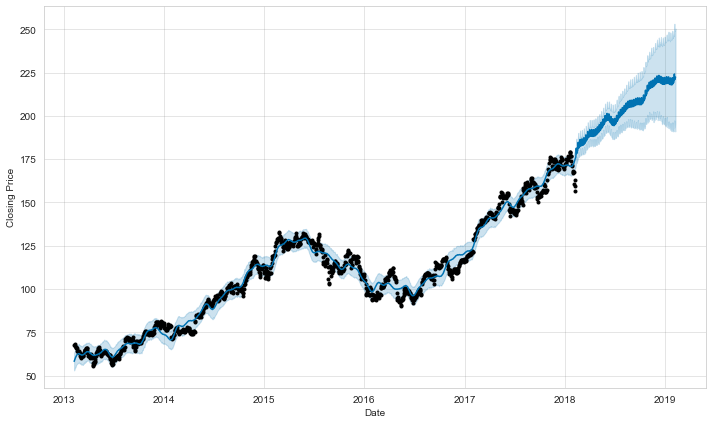

In [24]:
# Plotting the Apple Stock Forecast for Period of One years
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')
# So the model predicts that the Apple stock Price would increase from Mar 2018 to Mar 2019.

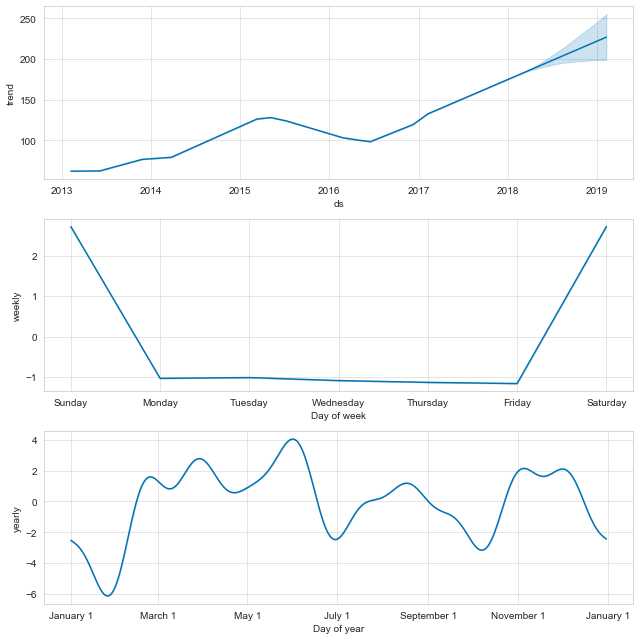

In [25]:
# Plotting component of the Forecast
figure=m.plot_components(forecast)

1. Historical Trend Show that the Price of Apple stock has been increasing. Ivestors must have made good money on it.

2. Weekly trend shows that the Stock price increase is highest on Tuesday then reduces as week proceeds.

3. The annual trend shows the seasoniality of the stock.It can be figured out the stock price peaks in month of May.

In [26]:
# Observe Prediction on Plot
from fbprophet.plot import plot_plotly

offline.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
offline.iplot(fig)

## Prophet Model -2

In [27]:
df_prophet.head()

ds        y
0 2013-02-08  67.8542
1 2013-02-11  68.5614
2 2013-02-12  66.8428
3 2013-02-13  66.7156
4 2013-02-14  66.6556

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
#copy the dataframe to your predefined dataframe
#copy only the column that you will use
df_aapl = df_prophet.copy()
df_aapl['date'] = df_aapl.index
df_aapl = df_aapl[['ds', 'y']]
df_aapl.columns = ['ds', 'y']
df_aapl.head()

ds        y
0 2013-02-08  67.8542
1 2013-02-11  68.5614
2 2013-02-12  66.8428
3 2013-02-13  66.7156
4 2013-02-14  66.6556

In [30]:
#saved original data before it's log-transformed
df_aapl['y_origin'] = df_aapl['y']

#applied log transformation
df_aapl['y'] = np.log(df_aapl['y'])

#convert ds to datetime type
df_aapl['ds'] =  pd.to_datetime(df_aapl['ds'])
df_aapl.head()

ds         y  y_origin
0 2013-02-08  4.217361   67.8542
1 2013-02-11  4.227730   68.5614
2 2013-02-12  4.202344   66.8428
3 2013-02-13  4.200439   66.7156
4 2013-02-14  4.199539   66.6556

In [31]:
#plot the trends
offline.iplot([go.Scatter(
    x=df_aapl.ds,
    y=df_aapl.y_origin
)])

In [32]:
#noise detection for input as changepoints date
mean = df_aapl['y'].mean()
stdev = df_aapl['y'].std()

q1 = df_aapl['y'].quantile(0.25)
q3 = df_aapl['y'].quantile(0.75)
iqr = q3 - q1
high = mean + stdev
low = mean - stdev

In [33]:
#define this as changepoints in case you want to filter noise date using mean and standard deviation
df_filtered = df_aapl[(df_aapl['y'] > high) | (df_aapl['y'] < low)]
df_filtered_changepoints = df_filtered

#define this as changepoints in case you want to filter noise date using IQR
filtered_iqr = df_aapl[(df_aapl['y'] < q1 - (1.5 * iqr)) | (df_aapl['y'] < q3 + (1.5 * iqr)) ]

In [34]:
#let's try using mean and standard deviation to get the changepoints
#Create a trace
trace = go.Scatter(
    x = df_aapl['ds'],
    y = df_aapl['y'],
    mode = 'lines',
    name = 'actual data'
)
trace_cp = go.Scatter(
    x = df_filtered_changepoints['ds'],
    y = df_filtered_changepoints['y'],
    mode = 'markers',
    name = 'changepoint'
)

data = [trace,trace_cp]
fig = go.Figure(data=data)
py.offline.iplot(fig)

In [35]:
#instantiate Prophet Object
prophet = Prophet(
                  interval_width = 0.95,
                  weekly_seasonality = True,
                  yearly_seasonality = True,
                  changepoint_prior_scale = 0.095
)

#fit the model to training data 
prophet.fit(df_aapl)

future = prophet.make_future_dataframe(periods = 60, freq = 'd')
future['cap'] = 5.05
forecast = prophet.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
#make a predicition for 60 datapoints on daily level
#set the cap as defined above on the training data
future = prophet.make_future_dataframe(periods = 60, freq = 'd')
future['cap'] = 5.05
forecast = prophet.predict(future)

In [37]:
#plot the predicted value and observed value
offline.iplot([
    go.Scatter(x=df_aapl['ds'], y=df_aapl['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower')
])

In [38]:
#merge the actual data and forecasted data to get the error metrics
df_comparison = pd.DataFrame()
df_comparison = pd.merge(df_aapl, forecast, left_on = 'ds', right_on = 'ds')
df_comparison.head()

ds         y  y_origin     trend   cap  yhat_lower  yhat_upper  \
0 2013-02-08  4.217361   67.8542  4.183699  5.05    4.097082    4.213508   
1 2013-02-11  4.227730   68.5614  4.179336  5.05    4.111497    4.220068   
2 2013-02-12  4.202344   66.8428  4.177881  5.05    4.112541    4.217740   
3 2013-02-13  4.200439   66.7156  4.176427  5.05    4.111105    4.221016   
4 2013-02-14  4.199539   66.6556  4.174972  5.05    4.109165    4.225973   

   trend_lower  trend_upper  additive_terms  ...    weekly  weekly_lower  \
0     4.183699     4.183699       -0.029610  ... -0.004837     -0.004837   
1     4.179336     4.179336       -0.017206  ... -0.003867     -0.003867   
2     4.177881     4.177881       -0.013156  ... -0.003408     -0.003408   
3     4.176427     4.176427       -0.010208  ... -0.003853     -0.003853   
4     4.174972     4.174972       -0.007664  ... -0.004464     -0.004464   

   weekly_upper    yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0     -0.004837 -0.024773     -0.024773     -0.024773                   0.0   
1     -0.003867 -0.013339     -0.013339     -0.013339                   0.0   
2     -0.003408 -0.009749     -0.009749     -0.009749                   0.0   
3     -0.003853 -0.006355     -0.006355     -0.006355                   0.0   
4     -0.004464 -0.003201     -0.003201     -0.003201                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                         0.0                         0.0  4.154089  
1                         0.0                         0.0  4.162129  
2                         0.0                         0.0  4.164725  
3                         0.0                         0.0  4.166219  
4                         0.0                         0.0  4.167308  

[5 rows x 22 columns]

In [39]:
#print performance metrics
print("MAE yhat\t: {}\nMAE trend\t: {}\nMAE yhat_lower: {}\nMAE yhat_upper: {}".format(
    mean_absolute_error(df_comparison['y'].values,df_comparison['yhat']),
    mean_absolute_error(df_comparison['y'].values,df_comparison['trend']),
    mean_absolute_error(df_comparison['y'].values,df_comparison['yhat_lower']),
    mean_absolute_error(df_comparison['y'].values,df_comparison['yhat_upper'])))

MAE yhat	: 0.0222436165601932
MAE trend	: 0.029486024220936408
MAE yhat_lower: 0.05723594968999737
MAE yhat_upper: 0.056658366562270676


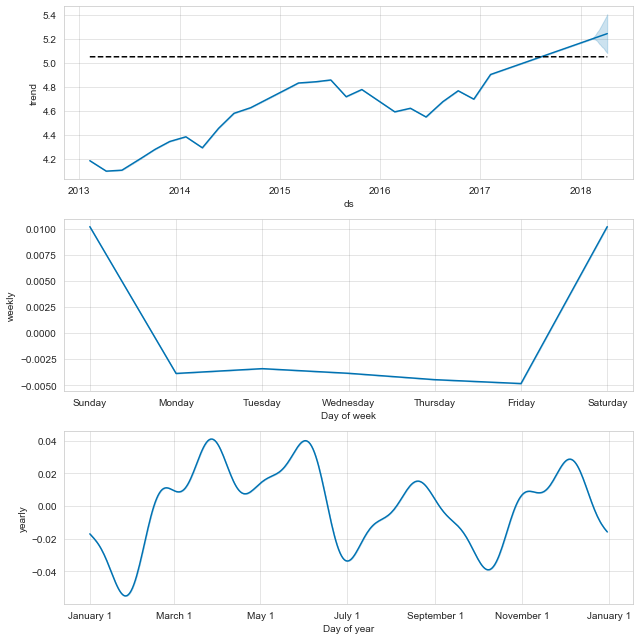

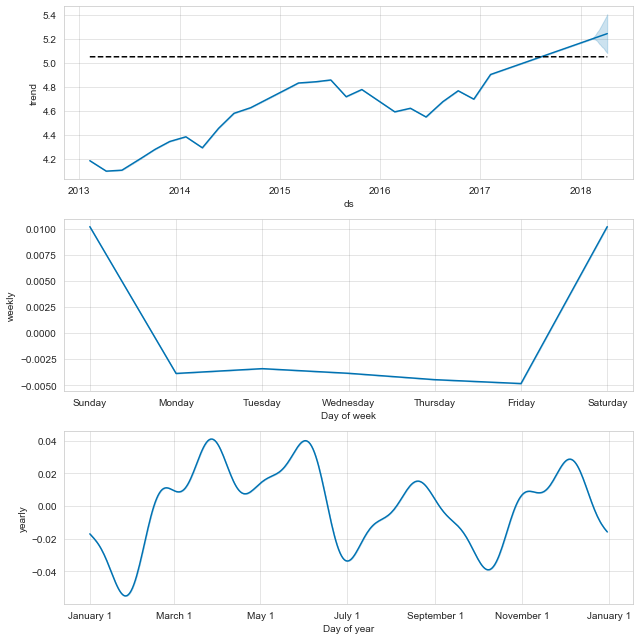

In [40]:
#Print the forecast component
prophet.plot_components(forecast)

### Autocorrelation function (ACF)

In [41]:
#Stationary Series:
# Statistical properties such as the mean and variance is not constant over a time hence it is a non-stationary series.
Q1_2017_mean = df_aapl.y_origin[(df_aapl.ds >= '2017-01-01') & (df_aapl.ds < '2017-03-31')].mean()
Q1_2017_var  = df_aapl.y_origin[(df_aapl.ds >= '2017-01-01') & (df_aapl.ds < '2017-03-31')].var()
Q1_2015_mean = df_aapl.y_origin[(df_aapl.ds >= '2015-01-01') & (df_aapl.ds < '2015-03-31')].mean()
Q1_2015_var  = df_aapl.y_origin[(df_aapl.ds >= '2015-01-01') & (df_aapl.ds < '2015-03-31')].var()
Q4_2013_mean = df_aapl.y_origin[(df_aapl.ds >= '2013-10-01') & (df_aapl.ds < '2013-12-31')].mean()
Q4_2013_var  = df_aapl.y_origin[(df_aapl.ds >= '2013-10-01') & (df_aapl.ds < '2013-12-31')].var()

print('2017 Quarter 1 closing price mean     : %.2f ' % (Q1_2017_mean))
print('2017 Quarter 1 closing price variance : %.2f ' % (Q1_2017_var))
print("---------------------------------------------- ")
print('2015 Quarter 1 closing price mean     : %.2f ' % (Q1_2015_mean))
print('2015 Quarter 1 closing price variance : %.2f ' % (Q1_2015_var))
print("---------------------------------------------- ")
print('2013 Quarter 4 closing price mean     : %.2f ' % (Q4_2013_mean))
print('2013 Quarter 4 closing price variance : %.2f ' % (Q4_2013_var))

2017 Quarter 1 closing price mean     : 131.52 
2017 Quarter 1 closing price variance : 83.29 
---------------------------------------------- 
2015 Quarter 1 closing price mean     : 120.72 
2015 Quarter 1 closing price variance : 64.66 
---------------------------------------------- 
2013 Quarter 4 closing price mean     : 75.49 
2013 Quarter 4 closing price variance : 13.94 


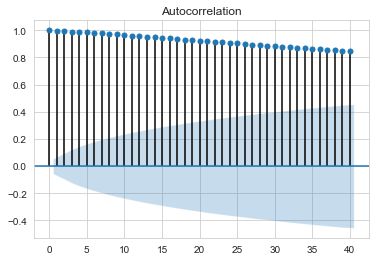

In [42]:
# Plot the autocorrelation function (ACF). The ACF value decreases very slowely for non-stationary series.
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_aapl.y_origin, lags=40)
plt.show()

## Autoregressive Integrated Moving Average (ARIMA) Model

In [43]:
aapl.head()

date     open     high      low    close     volume  Name  close_10  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       NaN   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       NaN   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       NaN   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       NaN   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       NaN   

   close_50  Daily Return  
0       NaN           NaN  
1       NaN      0.010422  
2       NaN     -0.025067  
3       NaN     -0.001903  
4       NaN     -0.000899

In [44]:
# Keep only 'Close' column
df = aapl[['date','close']]
df=df.set_index('date')
#df = df[df.index >= '2013-01-01']
df.head()

close
date               
2013-02-08  67.8542
2013-02-11  68.5614
2013-02-12  66.8428
2013-02-13  66.7156
2013-02-14  66.6556

In [45]:
# Convert series into Stationary series.
# Calculate the differnce of a element compared with a prevous row element
df_diff = df.diff(periods=1)
# Drop rows with NAN value. First row element will have NAN value because there is no previous element for calculating the differnce.
df_diff = df_diff.dropna()
# Display first five rows
df_diff.head()

close
date              
2013-02-11  0.7072
2013-02-12 -1.7186
2013-02-13 -0.1272
2013-02-14 -0.0600
2013-02-15 -0.9185

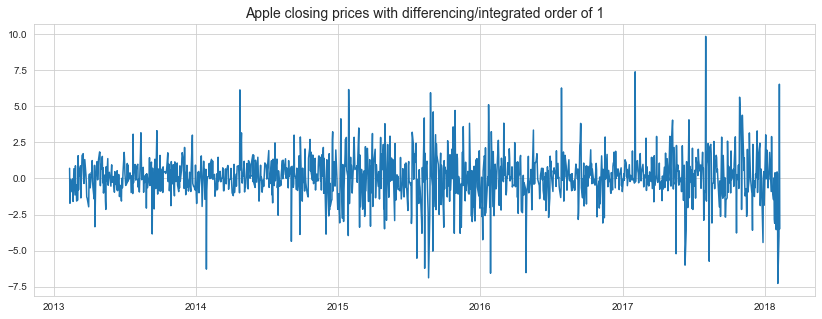

In [46]:
plt.figure(figsize=(14,5))
plt.title("Apple closing prices with differencing/integrated order of 1",fontsize=14)
plt.plot(df_diff)

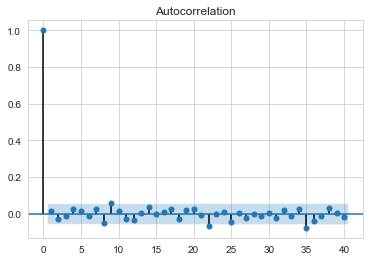

In [47]:
# Plot the autocorrelation function. The ACF value decreases to zero quickly for stationary series.

plot_acf(df_diff, lags=40)
plt.show()

In [48]:
# Autoregression Model
X = df.values
size = int(len(X) * 0.70)  # 70 % 
# Training set
train = X[:size]
# testing set
test  = X[size:len(X)]

print("Total Samples    : %d" % len(X))
print("Training Samples : %d" % len(train))
print("Testing Samples  : %d" % len(test))

Total Samples    : 1259
Training Samples : 881
Testing Samples  : 378


In [49]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

# train autoregression
ar_model = AR(train)
ar_model_fit = ar_model.fit()
print("Lags : %s" % ar_model_fit.k_ar)
print("Coefficients : %s" % ar_model_fit.params)

Lags : 21
Coefficients : [ 4.18251660e-01  1.01501445e+00 -3.97364250e-02  1.74680223e-02
 -1.29665205e-02 -2.23463236e-03  4.30909868e-03  6.86948634e-02
 -8.15879528e-02  6.33072710e-02 -4.65459001e-02 -2.10471874e-02
  2.99959776e-02 -2.65662675e-04  4.59938738e-02 -3.36772234e-02
 -1.54110205e-02  2.52575341e-02 -5.98069709e-02  4.49690235e-02
  5.02647080e-02 -5.58232517e-02]


AR MModel Mean Squared Error : 1553.42


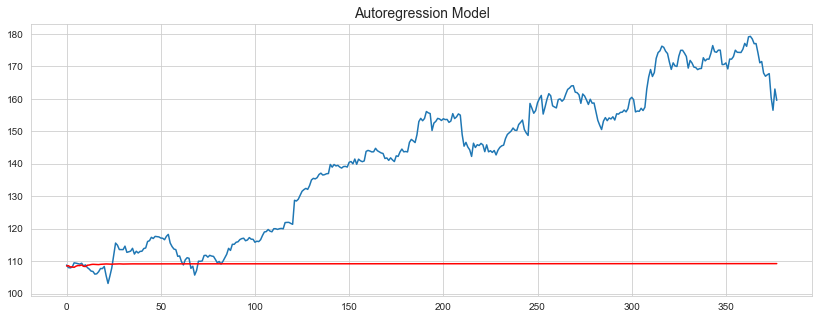

In [50]:
# make predictions
preds = ar_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

print("AR MModel Mean Squared Error : %.2f" % mean_squared_error(test, preds))
plt.figure(figsize=(14,5))
plt.title("Autoregression Model",fontsize=14)
plt.plot(test)
plt.plot(preds, color='r')

In [51]:
# Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

stock_history = [x for x in train ]
preds = []

# order=(p,d,q)
p = 5   # AR parameters/Lags
q = 1    # Differencing order
d = 0    # MA parameters

#arima_model = ARIMA(train, order=(5,1,0))
#arima_model_fit = arima_model.fit()

for i in range(len(test)):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the test price to a stock history data
    stock_history.append(test[i])  
    # append the forcasted price to a list
    preds.append(output)

Mean Squared Error : 2.93


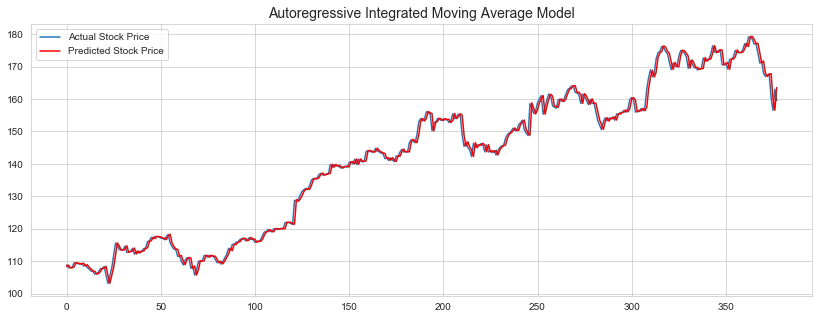

In [52]:
print("Mean Squared Error : %.2f" % mean_squared_error(test, preds))
plt.figure(figsize=(14,5))
plt.title("Autoregressive Integrated Moving Average Model",fontsize=14)
plt.plot(test, label='Actual Stock Price')
plt.plot(preds, color='r', label='Predicted Stock Price')
plt.legend()

In [53]:
# Forecasting Stock Prices for next 300 days

train_test = np.concatenate((train, test))
stock_history = [x for x in train_test]
preds = []
forecasting_days = 300

for i in range(forecasting_days):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the forecasted price to a stock history data
    stock_history.append(output)  
    # append the forcasted price to a prediction list
    preds.append(output)

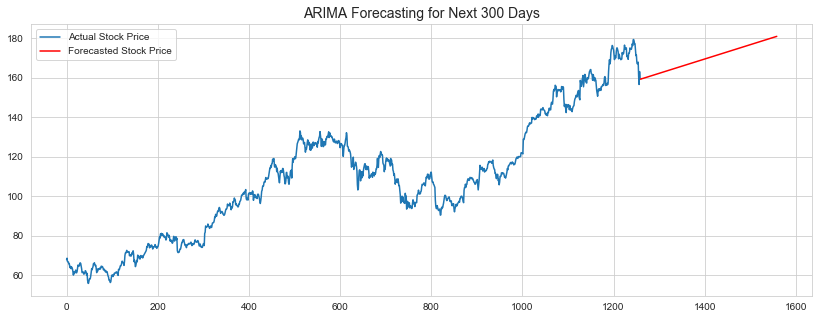

In [54]:
start = len(train_test)
end = len(train_test) + int(forecasting_days)
history = pd.Series(stock_history)

plt.figure(figsize=(14,5))
plt.title("ARIMA Forecasting for Next 300 Days",fontsize=14)
plt.plot(history[0:start], label='Actual Stock Price')
plt.plot(history[start:end], color='r', label='Forecasted Stock Price')
plt.legend()